#### Copyright 2019 Google LLC.

In [3]:
# Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
# https://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

# Image Classification Project

In this project, we will built an image classification model and use the model to identify if the image contain a particular object.  The outcome of the model will be true of false for each images.

## Overview

### Learning Objectives

* Use a classification toolkits (scikit-learn, TensorFlow, or Keras) and build an image classification model.
* Prepare image data to the appropriate format and quality to be a suitable input to the model.

### Prerequisites

* Classification with scikit-learn
* Classification with TensorFlow
* Neural Networks
* Image Classificaion with Keras
* Image Manipulation with Python

# Exercises

## Exercise 1: Coding

There are very few more important questions in life than "[Hot dog or not hot dog?](https://www.youtube.com/watch?v=ACmydtFDTGs)". For this workshop you will be tasked with creating a machine learning model that can **take an input image and determine if the image is of a hot dog or not a hot dog**.

Train your model with the [Kaggle Hot Dog/Not Hot Dog](https://www.kaggle.com/dansbecker/hot-dog-not-hot-dog/data) data set. Feel free to [do some background research](https://medium.com/@timanglade/how-hbos-silicon-valley-built-not-hotdog-with-mobile-tensorflow-keras-react-native-ef03260747f3) on the topic.

We have looked at regression, classification, and clustering models. We have used the Scikit Learn, TensorFlow, and Keras toolkits. Feel free to use the model and toolkit that you feel is the most appropriate.
 
**Graded** demonstrations of competency:
1. Pick a classification toolkit (eg: scikit-learn, TensorFlow or Keras) and provide jusitifaction for your choice. 
1. Obtain, prepare and load the dataset.
1. Define and train a classification model.
1. Test and evaluation your classification model. 
1. Apply your classification model to an image sourced from outside the Kaggle dataset. 
1. Test multiple models and/or sets of hyper-parameters and record the results. 
  
Some tips:
 
* Think about how to pre-process the images prior to use them as training data.  Should you train with images in color or grayscale, how many pixels should the image contains, etc. Clearly explain the reasoning for all of your choices in your Colab. 
 

### Student Solution

In [4]:
# Your code goes here
import altair as alt
import numpy as np 
import pandas as pd
import math
import matplotlib
import matplotlib.pyplot as plt
import re
import seaborn as sns
import cv2 as cv 

import zipfile
zip_ref = zipfile.ZipFile('hot-dog-not-hot-dog.zip', 'r')
zip_ref.extractall('./')
zip_ref.close()

#Use attached zip file (splits data into train, validation, and testing)

#Preprocessing

In [5]:
import glob
import cv2 as cv

train_images = [cv.imread(file) for file in glob.glob('hot-dog-not-hot-dog/train/hot_dog/*.jpg')]

train_labels = np.ones(len(train_images))

train_images_no = [cv.imread(file) for file in glob.glob('hot-dog-not-hot-dog/train/not_hot_dog/*.jpg')]

train_no_labels = np.zeros(len(train_images_no))

train_images = train_images + train_images_no
train_labels = np.concatenate((train_labels, train_no_labels), axis = 0)
print('image length:' + str(len(train_images)))
print('label length:' + str(len(train_labels)))

image length:498
label length:498


In [6]:
train_df = pd.DataFrame({'label': train_labels, 'images': list(train_images)}, columns=['label', 'images'])

In [7]:
test_images = [cv.imread(file) for file in glob.glob('hot-dog-not-hot-dog/test/hot_dog/*.jpg')]

test_labels = np.ones(len(test_images))

test_images_no = [cv.imread(file) for file in glob.glob('hot-dog-not-hot-dog/test/not_hot_dog/*.jpg')]

test_no_labels = np.zeros(len(test_images_no))

test_images = test_images + test_images_no
test_labels = np.concatenate((test_labels, test_no_labels), axis = 0)
print('image length:' + str(len(test_images)))
print('label length:' + str(len(test_labels)))

image length:500
label length:500


In [8]:
test_df = pd.DataFrame({'label': test_labels, 'images': list(test_images)}, columns=['label', 'images'])

In [9]:
#Check to see what the average size of the training dataset is
width = []
height = []
for i in train_df.images:
  width.append(i.shape[1])
  height.append(i.shape[0])

In [10]:
from collections import Counter

width = width

print(Counter(width).keys()) # equals to list(set(words))
print(Counter(width).values()) # counts the elements' frequency  


dict_keys([512, 289, 384, 382, 306, 383, 307, 193, 341, 288, 451, 374])
dict_values([362, 3, 62, 52, 4, 9, 1, 1, 1, 1, 1, 1])


In [11]:
from collections import Counter

height = height

print(Counter(height).keys()) # equals to list(set(words))
print(Counter(height).values()) # counts the elements' frequency

dict_keys([341, 512, 342, 384, 306, 307, 434, 308, 289, 288, 313, 292, 340, 501, 382, 446, 422, 343, 330, 436, 511, 378, 383, 396, 339, 385])
dict_values([12, 308, 1, 106, 8, 1, 1, 1, 4, 4, 1, 1, 2, 1, 28, 1, 1, 3, 1, 2, 2, 1, 5, 1, 1, 1])


Bring everything to 300x300 by adding padding

In [12]:
def pad(image):
  height = image.shape[0]
  width = image.shape[1]

  left_pad, right_pad, top_pad, bottom_pad = 0, 0, 0, 0
  if height > width:
    left_pad = int((height-width) / 2)
    right_pad = height-width-left_pad
  elif width > height:
    top_pad = int((width-height) / 2)
    bottom_pad = width-height-top_pad

  img_square = cv.copyMakeBorder(
      image,
      top_pad,
      bottom_pad,
      left_pad,
      right_pad,
      cv.BORDER_CONSTANT,
      value=(255,255,255))
  return img_square

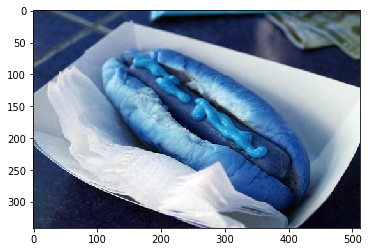

In [13]:
plt.imshow(train_df.images[0])
train_df.images[0][:,:,2] =  0.2989*train_df.images[0][:,:,0] +  0.5870*train_df.images[0][:,:,1] + 0.1140*train_df.images[0][:,:,2]

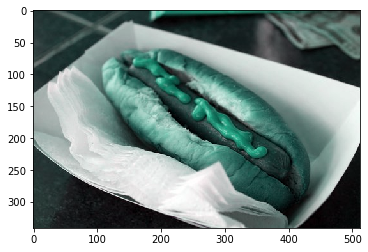

In [14]:
plt.imshow(train_df.images[0])

In [15]:
def toGray(image):
    # toGray converts RGB values to grayscale values by forming a weighted sum of the R, G, and B components:
    # 0.2989 * R + 0.5870 * G + 0.1140 * B 
    # source: https://www.mathworks.com/help/matlab/ref/rgb2gray.html
    image[:,:,0] = 0.2989*image[:,:,0] +  0.5870*image[:,:,1] + 0.1140*image[:,:,2]
    image[:,:,1] = 0.2989*image[:,:,0] +  0.5870*image[:,:,1] + 0.1140*image[:,:,2]
    image[:,:,2] = 0.2989*image[:,:,0] +  0.5870*image[:,:,1] + 0.1140*image[:,:,2]
    return image

In [16]:
def preprocess_image(image):
  image =toGray(image)
  image = pad(image)
  image_scaled = cv.resize(image, (100, 100))
  #image_scaled = np.true_divide(image_scaled, 255.0)
  #print(image_scaled.shape)
  return image_scaled

In [17]:
train_df.images = train_df.images.apply(lambda x: preprocess_image(x))
#print(plt.imshow(train_df.images[1]))


In [18]:
train_df.head(1)

,label,images
0,1.0,"[[[255, 255, 255], [255, 255, 255], [255, 255,..."


In [19]:
test_df.images = test_df.images.apply(lambda x: preprocess_image(x))
# print(plt.imshow(test_df.images[1]))


In [20]:
from keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
        rotation_range=40,
        width_shift_range=0.2,
        height_shift_range=0.2,
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        fill_mode='nearest')


Using TensorFlow backend.


In [21]:
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense
from keras.models import Sequential
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.layers.core import Activation
from keras.layers.core import Flatten
from keras.layers.core import Dense
from keras import backend as K

In [22]:
import tensorflow as tf
import tensorflow.keras.layers as layers
model = tf.keras.Sequential([
    

    layers.Conv2D(32,(3,3),
       input_shape=(100,100,3),
       activation = 'relu'
    ),
    
    layers.BatchNormalization(),
    layers.MaxPool2D((2,2)),
    layers.Dropout(0.25),
 

    layers.Flatten(),


    layers.Dense(512, activation = tf.nn.relu),
    layers.BatchNormalization(),
    layers.Dropout(0.25),

    layers.Dense(2, activation='softmax')
 
])
model.summary()

W0731 14:47:23.342927 4760626624 deprecation.py:506] From /Users/dorishuang/anaconda3/lib/python3.6/site-packages/tensorflow/python/ops/init_ops.py:1251: calling VarianceScaling.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 98, 98, 32)        896       
_________________________________________________________________
batch_normalization (BatchNo (None, 98, 98, 32)        128       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 49, 49, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 49, 49, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 76832)             0         
_________________________________________________________________
dense (Dense)                (None, 512)               39338496  
_________________________________________________________________
batch_normalization_1 (Batch (None, 512)               2

In [23]:
import keras
from keras.optimizers import Adam
model.compile(
    
    # Specify loss function
    loss=keras.losses.binary_crossentropy,
    
    # Specify optimizer
    optimizer= tf.keras.optimizers.Adam(lr=1e-4),
    
    # Specify metrics
    metrics=['accuracy']
)


W0731 14:47:24.109441 4760626624 deprecation_wrapper.py:119] From /Users/dorishuang/anaconda3/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:3376: The name tf.log is deprecated. Please use tf.math.log instead.

W0731 14:47:24.119503 4760626624 deprecation.py:323] From /Users/dorishuang/anaconda3/lib/python3.6/site-packages/tensorflow/python/ops/nn_impl.py:180: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [ ]:
batch_size = 32

# this is the augmentation configuration we will use for training
train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.3,
        zoom_range=0.4,
        rotation_range=90,
        horizontal_flip=True,
        preprocessing_function = preprocess_image
)

# this is the augmentation configuration we will use for testing:
# only rescaling
test_datagen = ImageDataGenerator(rescale=1./255, preprocessing_function = preprocess_image)

# this is a generator that will read pictures found in
# subfolers of 'data/train', and indefinitely generate
# batches of augmented image data
train_generator = train_datagen.flow_from_directory(
        './hot-dog-not-hot-dog/train',  # this is the target directory
        target_size=(100, 100),  # all images will be resized to 100x100
        batch_size=batch_size,
        class_mode='categorical')  # since we use binary_crossentropy loss, we need categorical labels

# this is a similar generator, for validation data
validation_generator = test_datagen.flow_from_directory(
        './hot-dog-not-hot-dog/validation',
        target_size=(100, 100),
        batch_size=batch_size,
        class_mode='categorical')

# this is a similar generator, for validation data
test_generator = test_datagen.flow_from_directory(
        './hot-dog-not-hot-dog/test',
        target_size=(100, 100),
        batch_size=batch_size, 
        class_mode='categorical')

In [ ]:
model.fit_generator(
        train_generator,
        steps_per_epoch=15,
        epochs=20,
        validation_data=validation_generator,
        validation_steps=15
)


In [ ]:
model.evaluate_generator(generator=test_generator,)

In [ ]:
'(0.3,0.4 : .57) 10 epochs'
'(0.3,0.4 : .62) 20 epochs'